In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib as mpl

font_path = os.path.join('Fonts', 'Formula1_font.ttf')
font_manager.fontManager.addfont(font_path)
f1_font = font_manager.FontProperties(fname=font_path)

In [3]:
seasonCalendar = pd.read_csv('Formula1_2022season_calendar.csv')
seasonCalendar.set_index('Round', inplace=True)
seasonDrivers = pd.read_csv('Formula1_2022season_drivers.csv')
seasonDrivers.set_index('Driver', inplace=True)
seasonTeams = pd.read_csv('Formula1_2022season_teams.csv')
seasonTeams.set_index('Team', inplace=True)
raceResults = pd.read_csv('Formula1_2022season_raceResults.csv')
raceResults.set_index('Track', inplace=True)
sprintRaceResults = pd.read_csv('Formula1_2022season_sprintRaceResults.csv')
driverOfTheDay = pd.read_csv('Formula1_2022season_driverOfTheDayVotes.csv')

In [4]:
# Assign Team colors
def assign_color_teams(teams):
    color_map={
        'Mercedes': '#00C8AA',   
        'Haas Ferrari': '#FFFFFF',
        'Haas F1 Team': '#FFFFFF',    
        'Aston Martin Aramco Mercedes': '#006F62',
        'Aston Martin': '#006F62',    
        'Williams Mercedes': '#005AFF',   
        'Williams': '#005AFF',   
        'Racing Bulls Honda RBPT': '#6692D1', 
        'AlphaTauri': '#6692D1', 
        'McLaren Mercedes': '#FF8205',   
        'McLaren': '#FF8205',   
        'Red Bull Racing Honda RBPT': '#0600F0',  
        'Red Bull Racing': '#0600F0',    
        'Ferrari': '#FF0000',   
        'Alfa Romeo Ferrari': '#C60000',
        'Alfa Romeo': '#C60000',
        'Alpine Renault': '#FF87BB',  
        'Alpine': '#FF87BB',  
    }
    return[color_map.get(team, '#888888') for team in teams]

# Assign Driver colors
def assign_color_drivers(drivers):
    color_map = {
        'Valtteri Bottas': '#C60000',
        'Guanyu Zhou': '#C60000',
        'Nico Hulkenberg': '#FFFFFF',
        'Kevin Magnussen': '#FFFFFF',
        'Fernando Alonso': '#006F62',
        'Lance Stroll': '#006F62',
        'Lando Norris': '#FF8205',
        'Oscar Piastri': '#FF8205',
        'Max Verstappen': '#0600F0',
        'Sergio Perez': '#0600F0',
        'Charles Leclerc': '#FF0000',
        'Carlos Sainz': '#FF0000',
        'Lewis Hamilton': '#00C8AA',
        'George Russell': '#00C8AA',
        'Esteban Ocon': '#FF87BB',
        'Pierre Gasly': '#FF87BB',
        'Jack Doohan': '#FF87BB',
        'Alex Albon': '#005AFF',
        'Logan Sargeant': '#005AFF',
        'Jamie Chadwick': '#005AFF',
        'Nyck De Vries': '#6692D1',
        'Yuki Tsunoda': '#6692D1',
        'Daniel Ricciardo': '#6692D1',
        'Liam Lawson': '#6692D1',
    }
    return [color_map.get(name, '#888888') for name in drivers]


# Set the dark theme for F1
def set_f1_dark_theme():
    mpl.rcParams.update({
        'figure.facecolor': '#15151E',
        'axes.facecolor': '#15151E',
        'axes.edgecolor': '#FFFFFF',
        'axes.labelcolor': '#FFFFFF',
        'axes.titleweight': 'bold',
        'axes.titlesize': 20,
        'axes.labelsize': 14,
        'xtick.color': '#CCCCCC',
        'ytick.color': '#CCCCCC',
        'axes.labelpad': 22,
        'grid.color': '#444444',
        'grid.alpha': 0.3,
        'legend.facecolor': '#222222',
        'legend.edgecolor': '#444444',
        'text.color': '#FFFFFF',
        'font.family': f1_font.get_name(),
        'figure.autolayout': True,
        'savefig.facecolor': '#121212',
    })

set_f1_dark_theme()

In [5]:
seasonCalendar

,Race Date,GP Name,Country,City,Circuit Name,First GP,Number of Laps,Circuit Length(km),Race Distance(km),Lap Record,Record Owner,Record Year,Turns,DRS Zones
Round,,,,,,,,,,,,,,
1,20/03/2022,Gulf Air Bahrain GP,Bahrain,Sakhir,Bahrain International Circuit,2004,57,5.412,308.238,1:31.447,Pedro de la Rosa,2005,15,3
2,27/03/2022,STC Saudi Arabian GP,Saudi Arabia,Jeddah,Jeddah Corniche Circuit,2021,50,6.174,308.450,1:30.774,Lewis Hamilton,2021,27,3
3,10/04/2022,Heineken Australian GP,Australia,Melbourne,Albert Park Circuit,1996,58,5.278,306.124,1:20.260,Charles Leclerc,2022,14,2
4,24/04/2022,Rolex Gran Premio Del Made in Italy e Dell'Emi...,Italy,Imola,Autodromo Enzo e Dino Ferrari,1980,63,4.909,309.049,1:15.484,Lewis Hamilton,2020,18,1
5,08/05/2022,Crypto.com Miami GP,United States,Miami,Miami International Autodrome,2022,57,5.412,308.326,1:31.361,Max Verstappen,2022,19,3
6,22/05/2022,Pirelli Gran Premio de España,Spain,Catalunya,Circuit de Barcelona-Catalunya,1991,66,4.675,308.424,1:18.149,Max Verstappen,2021,16,2
7,29/05/2022,Grand Prix de Monaco,Monaco,Monte Carlo,Circuit de Monaco,1950,78,3.337,260.286,1:12.909,Lewis Hamilton,2021,19,1
8,12/06/2022,Azerbaijan GP,Azerbaijan,Baku,Baku City Circuit,2016,51,6.003,306.049,1:43.009,Charles Leclerc,2019,20,2
9,19/06/2022,AWS Grand Prix du Canada,Canada,Montréal,Circuit Gilles-Villeneuve,1978,70,4.361,305.270,1:13.078,Valtteri Bottas,2019,14,3


In [6]:
seasonDrivers

,Abbreviation,No,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position,Date of Birth,Place of Birth
Driver,,,,,,,,,,,,
Max Verstappen,VER,1,Red Bull Racing,Netherlands,77,2011.5,163,2,1(x35),1,30/09/1997,"Hasselt,Belgium"
Charles Leclerc,LEC,16,Ferrari,Monaco,24,868.0,103,0,1(x5),1,16/10/1997,"Monte Carlo, Monaco"
Sergio Perez,PER,11,Red Bull Racing,Mexico,26,1201.0,236,0,1(x4),1,26/01/1990,"Guadalajara, Mexico"
George Russell,RUS,63,Mercedes,United Kingdom,9,294.0,82,0,1(x1),1,15/02/1998,"King's Lynn, England"
Carlos Sainz,SAI,55,Ferrari,Spain,15,782.5,163,0,1(x1),1,01/09/1994,"Madrid, Spain"
Lewis Hamilton,HAM,44,Mercedes,United Kingdom,191,4405.5,310,7,1(x103),1,07/01/1985,"Stevenage, England"
Lando Norris,NOR,4,McLaren,United Kingdom,6,428.0,82,0,2(x1),1,13/11/1999,"Bristol, England"
Esteban Ocon,OCO,31,Alpine,France,2,364.0,111,0,1(x1),3,17/09/1996,"Evreux, Normandy"
Fernando Alonso,ALO,14,Alpine,Spain,98,2061.0,358,2,1(x32),1,29/07/1981,"Oviedo, Spain"


In [7]:
seasonTeams

,Full Team Name,Base,Team Chief,Technical Chief,Chassis,Power Unit,First Team Entry,World Championships,Highest Race Finish,Pole Positions,Fastest Laps
Team,,,,,,,,,,,
Red Bull Racing,Oracle Red Bull Racing,"Milton Keynes, United Kingdom",Christian Horner,Pierre Waché,RB18,Red Bull Powertrains,1997,5,1(x92),81,84
Ferrari,Scuderia Ferrari,"Maranello, Italy",Mattia Binotto,Enrico Cardile / Enrico Gualtieri,F1-75,Ferrari,1950,16,1(x243),242,258
Mercedes,Mercedes-AMG Petronas F1 Team,"Brackley, United Kingdom",Toto Wolff,Mike Elliott,W13,Mercedes,1970,8,1(x116),128,91
Alpine,BWT Alpine F1 Team,"Enstone, United Kingdom",Otmar Szafneuer,Pat Fry,A522,Renault,1986,2,1(x21),20,15
McLaren,McLaren F1 Team,"Woking, United Kingdom",Andreas Seidl,James Key,MCL36,Mercedes,1966,8,1(x183),156,162
Alfa Romeo,Alfa Romeo F1 Team ORLEN,"Hinwil, Switzerland",Frédéric Vasseur,Jan Monchaux,C42,Ferrari,1993,0,1(x1),1,6
Aston Martin,Aston Martin Aramco Cognizant F1 Team,"Silverstone, United Kingdom",Mike Crack,Andrew Green,AMR22,Mercedes,2018,0,1(x1),1,0
Haas,Haas F1 Team,"Kannapolis, United States",Guenther Steiner,Simone Resta,VF-22,Ferrari,2016,0,4(x1),1,2
AlphaTauri,Scuderia AlphaTauri,"Faenza, Italy",Franz Tost,Jody Egginton,AT03,Red Bull Powertrains,1985,0,1(x2),1,2


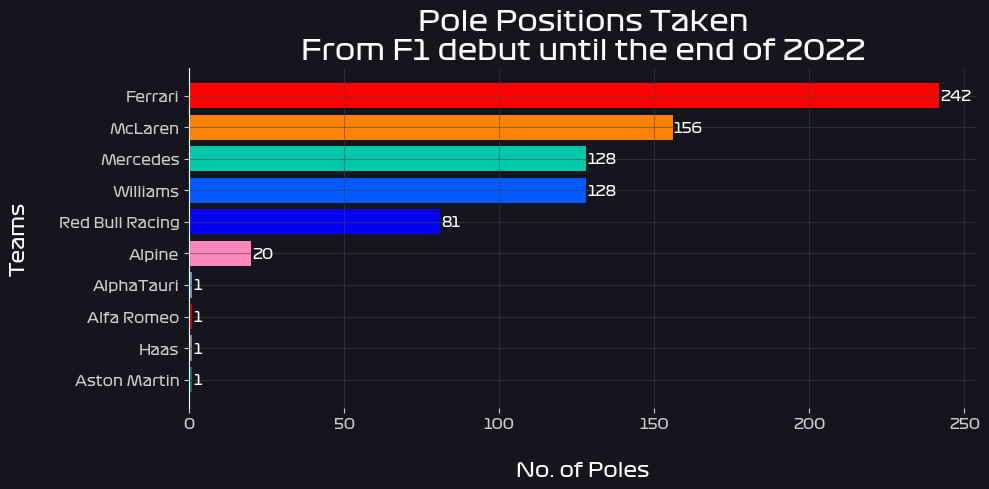

In [ ]:
# No. of Pole positions taken by a team since debut upto the end of 2022
seasonteams_sorted = seasonTeams.sort_values(by='Pole Positions', ascending=True)

teams = seasonteams_sorted.index.tolist()
season_poles = seasonteams_sorted['Pole Positions'].tolist()
color = assign_color_teams(teams)

# Plotting
plt.figure(figsize=(10,5))
bars = plt.barh(teams, season_poles, color = color)
plt.title('Pole Positions Taken\nFrom F1 debut until the end of 2022', fontsize=20, fontweight='bold')
plt.xlabel('No. of Poles', fontsize=14, fontweight='bold')
plt.ylabel('Teams', fontsize=14, fontweight='bold')

plt.grid(axis='y', alpha=0.5, zorder=1)
plt.grid(axis='x', alpha=0.5, zorder=1)

ax=plt.gca()
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i,(value, team) in enumerate(zip(season_poles, teams)):
    plt.text(value + 0.3, i, str(value), va='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()

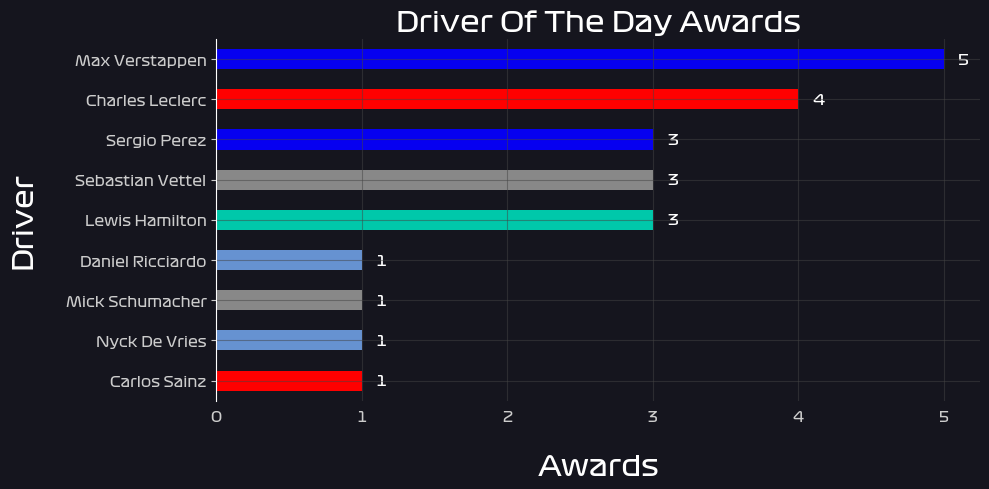

In [ ]:
# ----- Driver Of The Day (Data Visualization) -----
driverOfTheDay_Award = driverOfTheDay['1st Place'].value_counts()
driverOfTheDay_Award = driverOfTheDay_Award.sort_values()

# Plotting
driverOfTheDay_Award.plot(
    kind= 'barh',
    figsize=(10,5),
    color=assign_color_drivers(driverOfTheDay_Award.index)
)
plt.title('Driver Of The Day Awards')
plt.xlabel('Awards', fontsize=20, fontweight='bold')
plt.ylabel('Driver', fontsize=20, fontweight='bold')

ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='x', bottom=False)

for i, (driver, count) in enumerate(zip(driverOfTheDay_Award.index, driverOfTheDay_Award.values)):
    plt.text(count + 0.1, i, str(count), va='center', fontweight='bold', fontsize=11, zorder=1)

plt.grid(axis='x', alpha=0.5, zorder=0)
plt.grid(axis='y', alpha=0.5, zorder=0)
plt.tight_layout()
plt.show()